### Name: Your Name:ABHIJEET CHOUDHARI
### Library: PyCaret
### URL: https://pycaret.readthedocs.io/en/latest/
### Description:
PyCaret is an open-source, low-code machine learning library in Python that automates machine learning workflows"""

Installation of PyCaret


PyCaret is tested and supported on the following 64-bit systems:

Python 3.7 – 3.10
Python 3.9 for Ubuntu only
Ubuntu 16.04 or later
Windows 7 or later
You can install PyCaret with Python's pip package manager:

pip install pycaret

PyCaret's default installation will not install all the extra dependencies automatically. For that you will have to install the full version:

pip install pycaret[full]

or depending on your use-case you may install one of the following variant:

pip install pycaret[analysis]
pip install pycaret[models]
pip install pycaret[tuner]
pip install pycaret[mlops]
pip install pycaret[parallel]
pip install pycaret[test]

In [1]:
!pip install autopep8

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.0/45.0 kB 1.6 MB/s eta 0:00:00


In [2]:
import autopep8
autopep8

<module 'autopep8' from '/usr/local/lib/python3.10/dist-packages/autopep8.py'>

# Install Pycaret Library

In [3]:
# check installed version (must be >3.0)
!pip install pycaret
!pip install mlflow


import pycaret
pycaret.__version__

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 485.9/485.9 kB 6.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.1/12.1 MB 24.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 160.5/160.5 kB 22.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 257.7/257.7 kB 21.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.9/81.9 kB 7.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 19.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 7.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.8/106.8 kB 13.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.1/81.1 kB 7.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.9/21.9 MB 60.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.0/44.0 kB 5.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 53.8 M

'3.3.0'

Checking the PyCaret Version Installed

In [4]:
pycaret.__version__

'3.3.0'

**Regression Module** is a *supervised machine learning module* that is used for estimating the relationships between a dependent variable (often called the outcome variable, or target) and one or more independent variables (often called features, predictors, or covariates).

The objective of regression is to predict continuous values such as predicting sales amount, predicting quantity, predicting temperature, etc. Regression module provides several pre-processing features to preprocess the data for modeling through the setup function.

PyCaret's regression module has many preprocessing capabilities and it coems with over 25 ready-to-use algorithms and several plots to analyze the performance of trained models.

Regression Model and Analysis Workflow

A typical workflow in PyCaret Regression module consist of the following 5 steps in this order:

Setup ➡️ Compare Models ➡️ Analyze Model ➡️ Prediction ➡️ Save Model

In [5]:
### load sample dataset from pycaret dataset module
from pycaret.datasets import get_data
data = get_data('insurance')

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [6]:
data.shape

(1338, 7)

In [7]:
data.dtypes
data.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [8]:
!pip install --upgrade pycaret

# Setup
The setup function initializes the training environment and creates the transformation pipeline. Setup function must be called before executing any other function in PyCaret. It only has two mandatory parameters i.e. **data and target**. All the other parameters are optional.

In [9]:
# import pycaret regression and init setup
import mlflow
from pycaret.regression import *
s = setup(data, target = 'charges', session_id = 145, log_experiment= True, normalize= True, experiment_name= 'insuranceRun')

,Description,Value
0,Session id,145
1,Target,charges
2,Target type,Regression
3,Original data shape,"(1338, 7)"
4,Transformed data shape,"(1338, 10)"
5,Transformed train set shape,"(936, 10)"
6,Transformed test set shape,"(402, 10)"
7,Numeric features,3
8,Categorical features,3
9,Preprocess,True


2024/03/21 02:25:03 INFO mlflow.tracking.fluent: Experiment with name 'insuranceRun' does not exist. Creating a new experiment.


In [10]:
# check ML logs
get_logs()


,run_id,experiment_id,status,artifact_uri,start_time,end_time,params.Normalize method,params.Use GPU,params.Fold Number,params.Categorical imputation,...,params.CPU Jobs,tags.URI,tags.mlflow.source.name,tags.mlflow.runName,tags.mlflow.source.type,tags.Run ID,tags.Source,tags.mlflow.user,tags.USI,tags.Run Time
0,ba33818e63714967a239d20c956391b6,142844710054556839,RUNNING,file:///content/mlruns/142844710054556839/ba33...,2024-03-21 02:25:03.431000+00:00,None,zscore,False,10,mode,...,-1,d732a791,/usr/local/lib/python3.10/dist-packages/colab_...,Session Initialized 8f8b,LOCAL,ba33818e63714967a239d20c956391b6,setup,root,8f8b,9.33


Once the setup has been successfully executed it shows the information grid containing experiment level information.

Session id: A pseudo-random number distributed as a seed in all functions for later reproducibility. If no session_id is passed, a random number is automatically generated that is distributed to all functions.

Target type: Binary, Multiclass, or Regression. The Target type is automatically detected.

Original data shape: Shape of the original data prior to any transformations.

Transformed train set shape : Shape of transformed train set

Transformed test set shape : Shape of transformed test set

Numeric features : The number of features considered as numerical.

Categorical features : The number of features considered as categorical.


# Compare Models

The compare_models function trains and evaluates the performance of all the estimators available in the model library using cross-validation. The output of this function is a scoring grid with average cross-validated scores. Metrics evaluated during CV can be accessed using the get_metrics function. Custom metrics can be added or removed using add_metric and remove_metric function.

In [11]:
# compare baseline models
best = compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
gbr,Gradient Boosting Regressor,2510.6544,21104153.9865,4477.8653,0.8400,0.3933,0.2684,0.1840
rf,Random Forest Regressor,2638.8428,23209512.1782,4722.8278,0.8233,0.4230,0.2831,0.5130
lightgbm,Light Gradient Boosting Machine,2809.9527,22965259.8950,4692.6937,0.8231,0.4831,0.3191,0.4320
et,Extra Trees Regressor,2719.3485,27034213.4219,5099.9613,0.7951,0.4357,0.2808,0.3220
xgboost,Extreme Gradient Boosting,3027.3444,27805962.1500,5158.0875,0.7857,0.5182,0.3472,0.1540
ada,AdaBoost Regressor,4278.0386,28222515.5990,5260.0184,0.7849,0.5954,0.6789,0.1160
knn,K Neighbors Regressor,3430.4182,31736576.0000,5548.7092,0.7642,0.4410,0.3274,0.1010
lr,Linear Regression,4137.2627,35757373.3831,5932.0037,0.7289,0.5584,0.4223,1.1160
br,Bayesian Ridge,4144.4841,35828964.5067,5937.5020,0.7284,0.5491,0.4239,0.1310
ridge,Ridge Regression,4143.1843,35828066.5778,5937.3918,0.7283,0.5497,0.4236,0.1650


Processing:   0%|          | 0/81 [00:00<?, ?it/s]

# Log Experiments for All the Models compared
Logging of all experiment parameters,performace metric and hyper parameter tuning helps in maintaing a repository for future. This important part of any scientific activity to analyse and report the insights.

In [12]:
# check ML logs
InsuranceLog = get_logs()
pull()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
gbr,Gradient Boosting Regressor,2510.6544,2.110415e+07,4477.8653,0.8400,0.3933,0.2684,0.184
rf,Random Forest Regressor,2638.8428,2.320951e+07,4722.8278,0.8233,0.4230,0.2831,0.513
lightgbm,Light Gradient Boosting Machine,2809.9527,2.296526e+07,4692.6937,0.8231,0.4831,0.3191,0.432
et,Extra Trees Regressor,2719.3485,2.703421e+07,5099.9613,0.7951,0.4357,0.2808,0.322
xgboost,Extreme Gradient Boosting,3027.3444,2.780596e+07,5158.0875,0.7857,0.5182,0.3472,0.154
ada,AdaBoost Regressor,4278.0386,2.822252e+07,5260.0184,0.7849,0.5954,0.6789,0.116
knn,K Neighbors Regressor,3430.4182,3.173658e+07,5548.7092,0.7642,0.4410,0.3274,0.101
lr,Linear Regression,4137.2627,3.575737e+07,5932.0037,0.7289,0.5584,0.4223,1.116
br,Bayesian Ridge,4144.4841,3.582896e+07,5937.5020,0.7284,0.5491,0.4239,0.131
ridge,Ridge Regression,4143.1843,3.582807e+07,5937.3918,0.7283,0.5497,0.4236,0.165


***Good to Know: :***

PyCaret has two set of API's that you can work with.
 (1) Functional (as seen above) and
 (2) Object Oriented API.

With Object Oriented API instead of executing functions directly you will import a class and execute methods of class.

In [13]:
# import RegressionExperiment and init the class
from pycaret.regression import RegressionExperiment
exp = RegressionExperiment()

In [14]:
# check the type of exp
type(exp)

pycaret.regression.oop.RegressionExperiment

In [15]:
# init setup on exp
exp.setup(data, target = 'charges',session_id = 145)

,Description,Value
0,Session id,145
1,Target,charges
2,Target type,Regression
3,Original data shape,"(1338, 7)"
4,Transformed data shape,"(1338, 10)"
5,Transformed train set shape,"(936, 10)"
6,Transformed test set shape,"(402, 10)"
7,Numeric features,3
8,Categorical features,3
9,Preprocess,True


# Tuning the Best Model
By default, PyCaret using RandomGridSearch from the sklearn and you can change that by using **search_library and search_algorithm** parameter in the tune_model function.

In [16]:
tunemodel = tune_model(best)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,2832.0889,24986576.6731,4998.6575,0.8567,0.4479,0.3109
1,2113.3941,11382214.6292,3373.7538,0.8842,0.3455,0.2882
2,3044.3914,33339315.9566,5774.0208,0.6652,0.4783,0.2982
3,2665.7700,22631958.3084,4757.3058,0.8487,0.4656,0.2845
4,2667.9236,16604125.6628,4074.8160,0.8743,0.5703,0.3004
5,2494.4603,17141221.8866,4140.1959,0.8422,0.3570,0.2747
6,3410.8582,37505354.1508,6124.1615,0.7596,0.4597,0.2719
7,2615.7744,18543838.1226,4306.2557,0.8365,0.4536,0.2812
8,2038.0642,8166087.8356,2857.6368,0.9528,0.3046,0.2698


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


In [17]:
InsuranceLog = get_logs()
pull()

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,2832.0889,2.498658e+07,4998.6575,0.8567,0.4479,0.3109
1,2113.3941,1.138221e+07,3373.7538,0.8842,0.3455,0.2882
2,3044.3914,3.333932e+07,5774.0208,0.6652,0.4783,0.2982
3,2665.7700,2.263196e+07,4757.3058,0.8487,0.4656,0.2845
4,2667.9236,1.660413e+07,4074.8160,0.8743,0.5703,0.3004
5,2494.4603,1.714122e+07,4140.1959,0.8422,0.3570,0.2747
6,3410.8582,3.750535e+07,6124.1615,0.7596,0.4597,0.2719
7,2615.7744,1.854384e+07,4306.2557,0.8365,0.4536,0.2812
8,2038.0642,8.166088e+06,2857.6368,0.9528,0.3046,0.2698


# Good to Know :
Notice that the output between functional and OOP API is consistent. Rest of the functions in this notebook will only be shown using functional API only.

# Analyze Model
 The plot_model function is used to analyze the performance of a trained model on the test set. It may require re-training the model in certain cases.

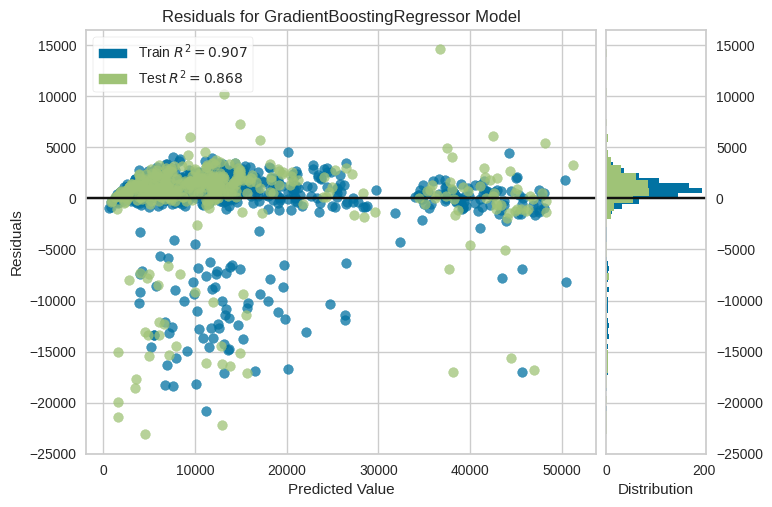

In [18]:
# plot residuals
plot_model(best, plot = 'residuals')

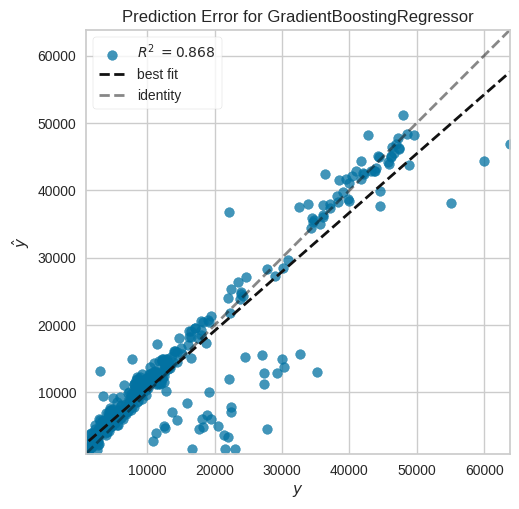

In [19]:
# plot error
plot_model(best, plot = 'error')

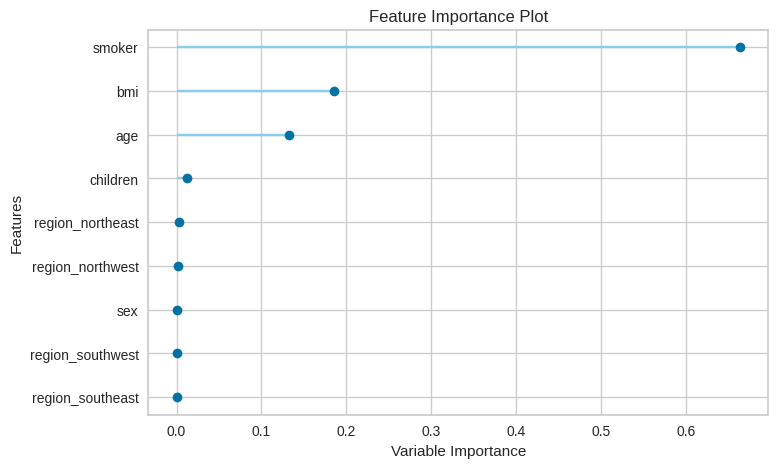

In [20]:
# plot feature importance
plot_model(best, plot = 'feature')

In [21]:
evaluate_model(best)


interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

# Prediction
The predict_model function returns prediction_label as new column to the input dataframe. When data is None (default), it uses the test set (created during the setup function) for scoring.

In [22]:
# predict on test set
holdout_pred = predict_model(best)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Gradient Boosting Regressor,2588.3292,22392754.1955,4732.0983,0.8678,0.4460,0.2676


In [23]:
# show predictions df
holdout_pred.head()

,age,sex,bmi,children,smoker,region,charges,prediction_label
786,60,male,36.955002,0,no,northeast,12741.166992,14403.902588
1006,28,male,29.260000,2,no,northeast,4438.263184,7440.851052
1177,40,female,27.400000,1,no,southwest,6496.886230,7459.096906
57,18,male,31.680000,2,yes,southeast,34303.167969,34389.448143
317,54,male,32.775002,0,no,northeast,10435.065430,12182.829284


# Save Model
Finally, you can save the entire pipeline on disk for later use, using pycaret's save_model function.

In [24]:
# save pipeline
save_model(best, 'my_first_pipeline')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=Memory(location=None),
          steps=[('numerical_imputer',
                  TransformerWrapper(include=['age', 'bmi', 'children'],
                                     transformer=SimpleImputer())),
                 ('categorical_imputer',
                  TransformerWrapper(include=['sex', 'smoker', 'region'],
                                     transformer=SimpleImputer(strategy='most_frequent'))),
                 ('ordinal_encoding',
                  TransformerWrapper(include=['sex', 'smoker'],
                                     transfor...
                                                                         {'col': 'smoker',
                                                                          'data_type': dtype('O'),
                                                                          'mapping': no     0
 yes    1
 NaN   -1
 dtype: int64}]))),
                 ('onehot_encoding',
                  TransformerWrapper(include=['region'],
    

In [25]:
# save experiment
s= save_experiment('insuranceRun')

Log the Experiments i.e each iteraiton of Running a Model with different parameters

In [26]:
get_log()

NameError: name 'get_log' is not defined